# Initial EDA of the data I cleaned in Part 1

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
warnings.filterwarnings('ignore')

In [8]:

content = pd.read_csv('SH_video_data.csv')

In [9]:
content.head()

,Unnamed: 0,title,duration,views,release_date
0,0,"We Need to Start Climate Engineering Soon, New...",8,24000,2023-11-13
1,1,Record Quantum Computation at D-Wave: Millions...,7,215000,2023-11-12
2,2,New Idea Solves Three Physics Mysteries at Onc...,7,348000,2023-11-11
3,3,"Meta Lawsuit Successful, Major Spam Domain Pro...",6,73000,2023-11-10
4,4,"Dark Matter Could Form Stars, New Theory Says",6,122000,2023-11-09


In [10]:
content.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
content.describe()

,duration,views
count,436.000000,4.360000e+02
mean,11.298165,3.162741e+05
std,6.653534,3.751401e+05
min,0.000000,6.300000e+03
25%,6.000000,1.337500e+05
50%,10.000000,2.300000e+05
75%,17.000000,3.635000e+05
max,45.000000,5.000000e+06


In [12]:
content[content['duration']==0]

,title,duration,views,release_date
241,"Science without the Gobbledygook, Channel Trai...",0,64000,2021-11-22
418,Solutions to the Grasshopper Problem,0,9600,2017-11-14
434,"3D Fermi surfaces, AuIn2",0,9600,2013-11-15


In [13]:
timeseries_content = content.sort_values(['release_date'], ascending=True)

In [14]:
timeseries_content.head()

,title,duration,views,release_date
435,What are natural units?,3,40000,2011-11-16
434,"3D Fermi surfaces, AuIn2",0,9600,2013-11-15
433,He likes to play with the fire,3,37000,2013-12-30
432,I saw the future,5,52000,2014-02-14
431,I can't forget,3,68000,2014-03-31


In [15]:
views = pd.DataFrame(timeseries_content.groupby('release_date')['views'].sum())


In [16]:
views.head()

,views
release_date,
2011-11-16,40000
2013-11-15,9600
2013-12-30,37000
2014-02-14,52000
2014-03-31,68000


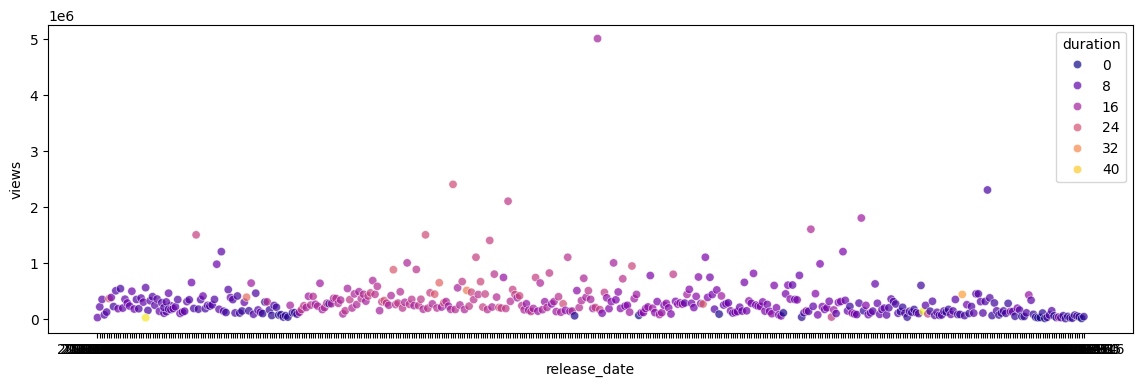

In [17]:
#te daty mniejsze od 2019-12-05 wez popraw pozniej
plt.figure(figsize=(14, 4))
ax = sns.scatterplot(data=content, x ='release_date', y ='views', hue='duration', palette='plasma', alpha=0.7)


plt.show()

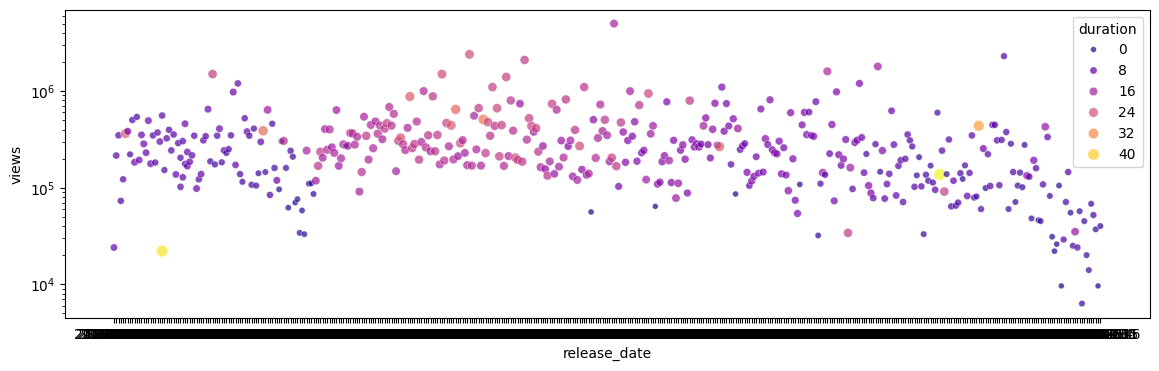

In [18]:
#te daty mniejsze od 2019-12-05 wez popraw pozniej
plt.figure(figsize=(14, 4))
plt.yscale("log")
ax = sns.scatterplot(data=content, x ='release_date', y ='views',size = 'duration', hue='duration', palette='plasma', alpha=0.7)


plt.show()

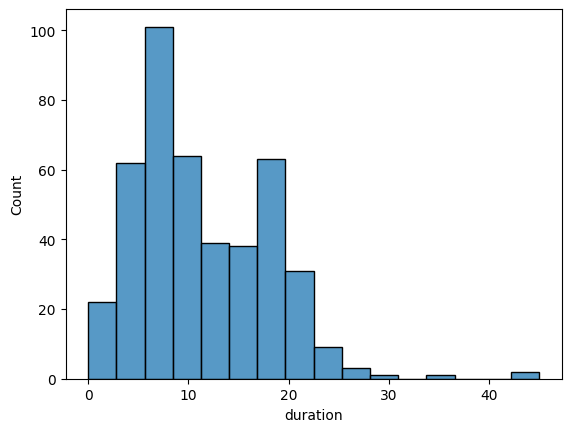

In [19]:
sns.histplot(data=content, x='duration')
plt.show()

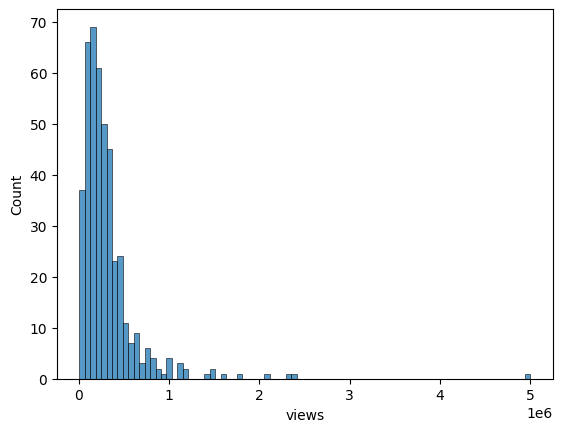

In [20]:
sns.histplot(data=content, x='views')
plt.xscale('linear')
plt.show()

<Figure size 2000x700 with 0 Axes>

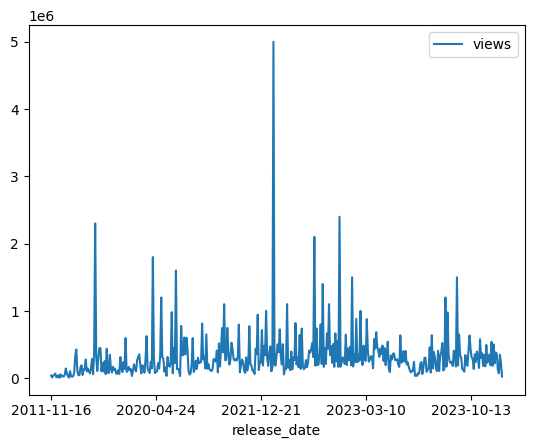

In [21]:
plt.figure(figsize=(20, 7))
views.plot(kind='line')
plt.show()

#check periodicity 

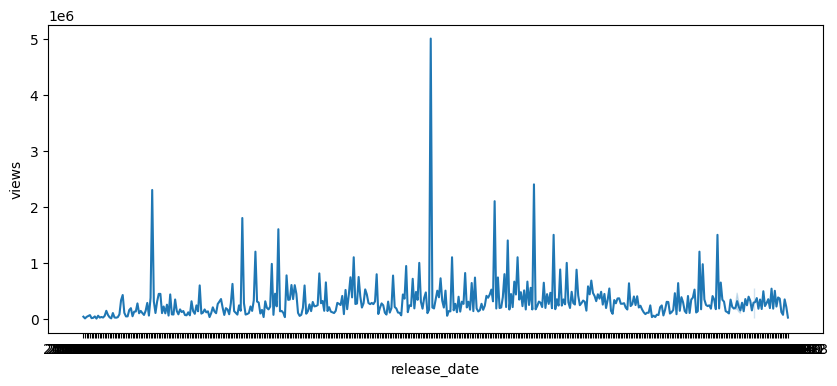

In [22]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=timeseries_content, x ='release_date', y ='views')
plt.show()